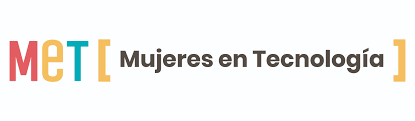

 ***METLAB-GRUPO-1***
 

 
<a id="ref7"></a>
### **Tabla de Contenido**

* <p><a href ="#ref1" > 1) Descripción del Problema </a></p>
* <p><a href ="#ref2" > 2) Descripción de los datos </a></p>
* <p><a href ="#ref3" > 3) Depuración de los datos </a></p>
* <p><a href ="#ref4" > 4) Análisis exploratorio y descriptivo</a></p>
* <p><a href ="#ref5" > 5) Modelación </a></p>
* <p><a href ="#ref6" > 6) Evaluación de Modelos </a></p>
* <p><a href ="#ref8" > 7) Conclusión</a></p>



*AGOSTO 2022*

<img src="https://m.media-amazon.com/images/I/41fl78jphsL.jpg" width=300, align ="center">

* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>


# 1) **Descripción del Problema**



En esta competencia, su tarea es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic con la anomalía del espacio-tiempo. Para ayudarlo a hacer estas predicciones, se le da un conjunto de registros personales recuperados del sistema informático dañado de la nave.

### ***Descripcion de archivo de Entrenamiento y Test***

El archivo ***train.csv*** esta compuesto por los registros personales de aproximadamente dos tercios alrededor de 8700 pasajeros, que se utilizarán como datos de entrenamiento.


El archivo ***test.csv*** son los registros personales para el tercio restante alrededor de 4300 pasajeros, que se utilizarán como datos de prueba.

#### *Su tarea es predecir el valor de para los pasajeros en este conjunto. Transported*

### **Descripciones de campos**

**PassengerId** - Un ID único para cada pasajero. Cada ID toma la forma donde indica un grupo con el que viaja el pasajero y es su número dentro del grupo. Las personas en un grupo a menudo son miembros de la familia, pero no siempre.gggg_ppggggpp

**HomePlanet** - El lugar del que partió el pasajero, típicamente su lugar de residencia permanente.

**CryoSleep** - Indica si el pasajero eligió ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

**Cabin** - El número de cabina donde se aloja el pasajero. Toma la forma deck/num/side, donde side puede ser ya sea P para babor o S para estribor.

**Destination** - El planeta al que el pasajero desembarcará.

**Age** - La edad del pasajero.

**VIP **- Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

**RoomService**, **FoodCourt**, **ShoppingMall,** **Spa**, **VRDeck** - Registran el monto que el pasajero a gastado en cada una de estas comodidades a las que tiene acceso, de acuerdo al villete que compro para la nave espacial Titanic.

**Name** - El nombre y apellidos del pasajero.

### **Variable Objetivo**

**Transported** - Si el pasajero fue transportado por error a otra dimensión. 0 No fue transportado, 1 Transportado. Este es el objetivo, la columna que estás tratando de predecir.

### **Descripcion de archivo Predicciones**
El resultado de las predicciones para cada pasajero, Verdadero o Falso; se cargan en el archivo ***sample_submission.csv*** que se envia a la competencia y tiene el siguiente formato

**PassengerId** - Id para cada pasajero en el conjunto de prueba.

**Transported** - El objetivo. Para cada pasajero, prediga True o False


<a id="ref2"></a>
# 2) **Descripción de los datos**

### **Librerias**

In [1]:
## Tratamiento de datos
import pandas as pd
import numpy as np
# Graficos
import matplotlib.pyplot as plt
import seaborn as sns
# Estadisticas
from scipy.stats import chi2_contingency # Probar dependencia estadistica entre variables categoricas
# Preprocesado y modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format # quitar notacion cientifica
# from google.colab import drive
# drive.mount('/content/drive')

OSError: [WinError 193] %1 is not a valid Win32 application

## **Carga de datos**

In [20]:
df = pd.read_csv('train.csv',sep=',')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.00,True,0.00,6819.00,0.00,1643.00,74.00,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.00,False,0.00,0.00,0.00,0.00,0.00,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.00,False,0.00,0.00,1872.00,1.00,0.00,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.00,False,0.00,1049.00,0.00,353.00,3235.00,Celeon Hontichre,False


In [14]:
df.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [10]:
print('Hay',np.count_nonzero(df.dtypes=='float64'),'variables numéricas decimales')
print('Hay',np.count_nonzero(df.dtypes=='int64'),'variables numéricas enteras')
print('Hay',np.count_nonzero(df.dtypes=='object'),'variables categóricas')
print('Hay',np.count_nonzero(df.dtypes=='bool'),'variables boleanas')

Hay 6 variables numéricas decimales
Hay 0 variables numéricas enteras
Hay 7 variables categóricas
Hay 1 variables boleanas


In [11]:
# Número de clases únicas en cada columna de objeto 
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [12]:
## Ahora si con la función discribe miro los principales indicadores estadisticos
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


[Text(0, 0, 'Age'),
 Text(1, 0, 'RoomService'),
 Text(2, 0, 'FoodCourt'),
 Text(3, 0, 'ShoppingMall'),
 Text(4, 0, 'Spa'),
 Text(5, 0, 'VRDeck')]

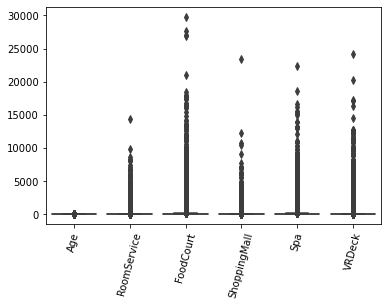

In [13]:
ax=sns.boxplot(data=df.select_dtypes(include = ['int64', 'float64']))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)

<AxesSubplot:xlabel='FoodCourt'>

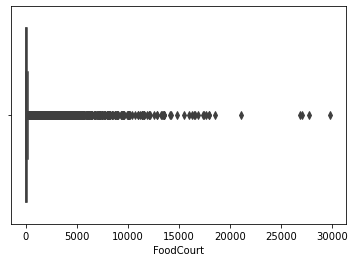

In [15]:
sns.boxplot(x=df['FoodCourt'])

### Balanceo de datos
El desbalanceo en la variable target a predecir, por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a las clases minoritarias. Por ese motivo, observo si la clase esta desbalanceada.

In [21]:
df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

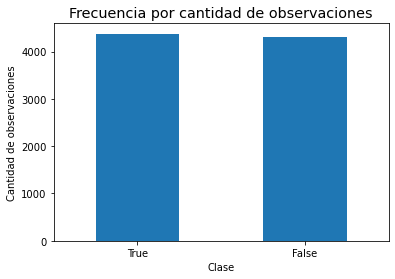

In [23]:
count_classes = pd.value_counts(df['Transported'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia por cantidad de observaciones", fontsize='x-large')
plt.xlabel("Clase")
plt.ylabel("Cantidad de observaciones");

<a id="ref3"></a>
# 3) **Depuración de los datos**
* <p><a href ="#ref7"> <font color=orange size=3> Inicio </font> </a></p>

## **Valores Nulos**

Los valores ausentes son muy importantes a la hora de crear modelos, algunos algoritmos no aceptan observaciones incompletas o bien se ven muy influenciados por ellas. Aunque la imputación de valores ausentes es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente con los datos de entrenamiento, su identificación se tiene que realizar antes de separar los datos para asegurar que se establecen todas las estrategias de imputación necesarias. Para efectos de este ejercicio vamos a excluir los Valores ausentes o nulos con porcentajes mayor del 20%.

In [24]:
nulos_porcentaje = (df.isna().sum())/len(df)*100
nulos_porcentaje.sort_values(ascending=False)

CryoSleep      2.50
ShoppingMall   2.39
VIP            2.34
HomePlanet     2.31
Name           2.30
Cabin          2.29
VRDeck         2.16
FoodCourt      2.11
Spa            2.11
Destination    2.09
RoomService    2.08
Age            2.06
PassengerId    0.00
Transported    0.00
dtype: float64

In [25]:
nulos_porcentaje [ nulos_porcentaje<=20]

PassengerId    0.00
HomePlanet     2.31
CryoSleep      2.50
Cabin          2.29
Destination    2.09
Age            2.06
VIP            2.34
RoomService    2.08
FoodCourt      2.11
ShoppingMall   2.39
Spa            2.11
VRDeck         2.16
Name           2.30
Transported    0.00
dtype: float64